In [153]:
# Librerias básicas
import pandas as pd
import numpy as np
import re
import datetime
# Librerias visualización
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

#Otras
import warnings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

warnings.filterwarnings('ignore')

In [154]:
txn = pd.read_csv('transactions_hist_nou.csv')

In [155]:
txn['Date'] = pd.to_datetime(txn['Date']) 

In [156]:
txn.set_index('Date', inplace=True)

In [157]:
txn

,Number,Type,From,To,Amount_dolars,Amount_eth,user_transaction,Adj Close,High,Low,Variance
Date,,,,,,,,,,,
2021-06-30,7051,Offered,NaN,NaN,60707.68,26.69,0x9e1893,2274.55,2282.989014,2090.760742,192.228272
2021-06-30,6263,Bid withdrawn,0x12D715,NaN,38667.31,17.00,0x6feee6,2274.55,2282.989014,2090.760742,192.228272
2021-06-30,9400,Offer withdrawn,NaN,NaN,NaN,NaN,0xf18631,2274.55,2282.989014,2090.760742,192.228272
2021-06-30,6493,Offered,NaN,NaN,45354.48,19.94,0xb07068,2274.55,2282.989014,2090.760742,192.228272
2021-06-30,6281,Transfer,0x8F8B47,0x63d4a5,NaN,NaN,0xd09776,2274.55,2282.989014,2090.760742,192.228272
...,...,...,...,...,...,...,...,...,...,...,...
2017-06-23,3029,Claimed,NaN,0xe4d36b,NaN,NaN,0x218fdb,341.74,348.006012,334.989990,13.016022
2017-06-23,8419,Claimed,NaN,0x6f4a2d,NaN,NaN,0x82a4ad,341.74,348.006012,334.989990,13.016022
2017-06-23,8420,Claimed,NaN,0xcc7c33,NaN,NaN,0x82a4ad,341.74,348.006012,334.989990,13.016022


In [26]:
profile = ProfileReport(txn, title="Cryptopunks Nou Transactions History profile report", minimal =True)

In [27]:
profile.to_file('nou_profile_output.html')

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [231]:
# Buscamos duplicados y eliminamos

In [158]:
txn.duplicated().value_counts()

False    133582
True        207
dtype: int64

Mirem els que en principi són duplicats:

In [203]:
txn = txn[txn.duplicated() == False]

In [277]:
txn.columns

Index(['Number', 'Type', 'From', 'To', 'Amount_dolars', 'Amount_eth', 'user_transaction', 'Adj Close', 'High', 'Low', 'Variance'], dtype='object')

In [278]:
txn = txn[['Number', 'Type', 'From', 'To', 'Amount_dolars', 'Amount_eth', 'user_transaction', 'Adj Close', 'Variance']]

## 1. Estudi de nuls

In [280]:
txn.isna().sum()

Number                  0
Type                    0
From                71996
To                  95098
Amount_dolars       44510
Amount_eth          44047
user_transaction        0
Adj Close             874
Variance              874
dtype: int64

Tenemos 44047 transacciones sin valor monetario (eth, y por lo tanto dolares). Vamos a estudiar porqué y a qué tipo de transaccion estan asociadas. Empezamos por la variable Adj Close, que nos permite sacar el valor en dolares a partir del precio de conversión ETH-DOL el día de la transacción.

In [204]:
# Nuls en Adj Close:
adj_nuls = txn[txn['Adj Close'].isna()].sort_values(by='Date', ascending = False)

In [205]:
adj_nuls

,Number,Type,From,To,Amount_dolars,Amount_eth,user_transaction,Adj Close,High,Low,Variance
Date,,,,,,,,,,,
2020-10-13,3107,Bid withdrawn,0xCf0E9b,NaN,NaN,21.00,0xd8620c,NaN,NaN,NaN,NaN
2020-10-13,5071,Transfer,0xf11dFe,0xb7d53f,NaN,NaN,0xedcd70,NaN,NaN,NaN,NaN
2020-10-13,8530,Offered,NaN,NaN,NaN,12.00,0xb43e21,NaN,NaN,NaN,NaN
2020-10-13,8845,Offered,NaN,NaN,NaN,9.25,0xdc3b37,NaN,NaN,NaN,NaN
2020-10-13,2831,Offered,NaN,NaN,NaN,8.00,0x0a741b,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-17,8820,Offered,NaN,NaN,NaN,1.97,0x4790d5,NaN,NaN,NaN,NaN
2020-04-17,8820,Offer withdrawn,NaN,NaN,NaN,NaN,0xbfdb30,NaN,NaN,NaN,NaN
2020-04-17,8820,Transfer,0x677B43,0x1a96af,NaN,NaN,0xbfdb30,NaN,NaN,NaN,NaN


Los 876 nuls que tenemos en Adj Close pertenecen a 4 dias, de los quales, des del principio, no teniamos el valor del ethereum en dolar.

In [206]:
adj_nuls.index.unique()

DatetimeIndex(['2020-10-13', '2020-10-12', '2020-10-09', '2020-04-17'], dtype='datetime64[ns]', name='Date', freq=None)

In [207]:
adj_nuls.index.value_counts()

2020-04-17    396
2020-10-09    199
2020-10-13    156
2020-10-12    123
Name: Date, dtype: int64

In [208]:
# Nuls en ethereum
txn['Amount_eth'].isna().sum()

44047

In [209]:
eth_nuls = txn[txn['Amount_eth'].isna()].sort_values(by='Date', ascending = False)

In [210]:
eth_nuls['Type'].value_counts(normalize=True)

Offer withdrawn      0.418644
Transfer             0.250778
Claimed              0.227030
Transfer (Wrap)      0.054782
Transfer (Unwrap)    0.048766
Name: Type, dtype: float64

In [211]:
txn['Type'].value_counts(normalize=True)

Offered              0.326062
Bid                  0.159228
Offer withdrawn      0.138043
Sold                 0.093531
Bid withdrawn        0.091442
Transfer             0.082691
Claimed              0.074860
Transfer (Wrap)      0.018064
Transfer (Unwrap)    0.016080
Name: Type, dtype: float64

In [212]:
# Nuls en dolares
txn['Amount_dolars'].isna().sum()

44510

In [213]:
dolars_nuls = txn[txn['Amount_dolars'].isna()].sort_values(by='Date', ascending = False)

Observando los percentatges y comparandolos con los nuls de ethereum vemos que los nuls en dolares son los mismos que en ethereum sumando los de Adj Close que no coinciden con los  de ethereum.

In [214]:
dolars_nuls['Type'].value_counts(normalize=True)

Offer withdrawn      0.414289
Transfer             0.248169
Claimed              0.224669
Transfer (Wrap)      0.054213
Transfer (Unwrap)    0.048259
Offered              0.006426
Bid                  0.001663
Bid withdrawn        0.001258
Sold                 0.001056
Name: Type, dtype: float64

## 2. Analisis descriptivo

### 2.1 Categóricas

#### 2.1.1 Tipos de transacciones ('Type')

Empezamos el analisis descriptivo con las variables categóricas, primero con el tipo de transacciones, para tener una idea de con què estamos trabajando:

In [215]:
txn['Type'].value_counts()

Offered              43556
Bid                  21270
Offer withdrawn      18440
Sold                 12494
Bid withdrawn        12215
Transfer             11046
Claimed              10000
Transfer (Wrap)       2413
Transfer (Unwrap)     2148
Name: Type, dtype: int64

In [216]:
x = txn['Type'].value_counts().keys()
y = txn['Type'].value_counts().values

<BarContainer object of 9 artists>

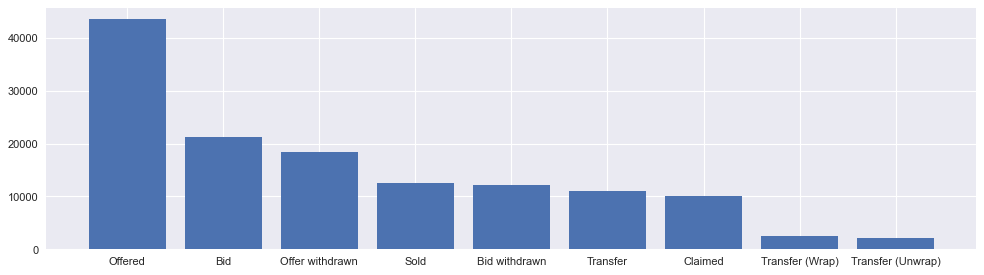

In [217]:
from matplotlib.pyplot import figure

figure(figsize=(15, 4), dpi=80)
plt.bar(x, y)

Buscamos el significado específico de cada tipo. 'Offered' significa que alguien un usuario ha ofrecido al propietario del punk una suma.

In [232]:
txn[txn['Type'] == 'Offered'].isna().sum()

Number                  0
Type                    0
From                43556
To                  43173
Amount_dolars         286
Amount_eth              0
user_transaction        0
Adj Close             286
High                  286
Low                   286
Variance              286
dtype: int64

Como vemos el tipo 'transfer' no comporta ningún intercanvio monetario, solo la transacción del punk de un usuari a otro:

In [219]:
txn[txn['Type'] == 'Transfer'].describe()

,Number,Amount_dolars,Amount_eth,Adj Close,High,Low,Variance
count,11046.000000,0.0,0.0,10891.000000,10891.000000,10891.000000,10891.000000
mean,5101.211479,NaN,NaN,1414.848651,1457.915243,1336.310461,121.604782
std,2936.135551,NaN,NaN,1066.586025,1095.748389,987.029273,134.923204
min,0.000000,NaN,NaN,84.440000,85.342743,82.829887,2.512856
25%,2457.250000,NaN,NaN,360.020000,371.119064,354.825134,17.901489
50%,5222.000000,NaN,NaN,1376.120000,1402.399780,1328.529053,89.245727
75%,7668.000000,NaN,NaN,2093.120000,2110.353516,1963.615479,161.717651
max,9999.000000,NaN,NaN,4168.700000,4362.350586,3785.848633,1485.475586


Withdrawn tampoco comporta ningún intercanvio monetario:

In [220]:
txn[txn['Type'] == 'Offer withdrawn'].describe()

,Number,Amount_dolars,Amount_eth,Adj Close,High,Low,Variance
count,18440.000000,0.0,0.0,18242.000000,18242.000000,18242.000000,18242.000000
mean,5435.309924,NaN,NaN,1243.232104,1285.735019,1175.822747,109.912271
std,2656.920789,NaN,NaN,1002.133539,1040.955052,938.069121,137.154522
min,1.000000,NaN,NaN,84.310000,85.342743,82.829887,1.215011
25%,3186.000000,NaN,NaN,282.800000,291.104004,273.110992,14.277008
50%,5428.000000,NaN,NaN,1298.100000,1368.074097,1225.274048,67.885010
75%,7707.000000,NaN,NaN,1935.600000,1969.546997,1845.119995,149.965454
max,9999.000000,NaN,NaN,4168.700000,4362.350586,3785.848633,1485.475586


In [221]:
round(txn[txn['Type'] == 'Sold'].describe(),2)

,Number,Amount_dolars,Amount_eth,Adj Close,High,Low,Variance
count,12494.00,12447.00,12494.00,12447.00,12447.00,12447.00,12447.00
mean,5374.04,29323.05,14.78,1204.25,1244.73,1141.09,103.64
std,2662.98,112329.78,59.19,973.63,1009.05,914.10,127.29
min,0.00,0.00,0.00,84.44,85.34,82.83,1.22
25%,3125.00,134.06,0.60,273.30,287.39,265.50,14.28
50%,5354.00,6754.52,6.50,1230.99,1282.58,1167.44,63.78
75%,7657.50,42648.71,21.95,1854.56,1936.45,1793.92,142.56
max,9998.00,7670018.77,4200.00,4168.70,4362.35,3785.85,1485.48


La media del precio histórico de venta en dolares es 29.360,04. El mínimo es 0 y el máximo son 7.670.018,77, con una desviación estándar de 112.284,38. El 50 percentil del precio histórico de venta en dolares se encuentra en los 6.784,11, teniendo el 25 percentil a 134,18 y el 75 a 42.714,17.

La media del precio histórico de venta en Ethereum es de 59,16. El mínimo són 0 y el máximo son 4200, con una desviación estándar de 59,16. El 50 percentil del precio histórico de venta en dolars se encuentra en los 6,5. El 25 percentil a 0.6 y el 75 a 21,95.

In [222]:
round(txn[txn['Type'] == 'Bid withdrawn'].describe(),2)

,Number,Amount_dolars,Amount_eth,Adj Close,High,Low,Variance
count,12215.00,12159.00,12215.00,12159.00,12159.00,12159.00,12159.00
mean,5124.21,38539.59,19.27,1301.13,1348.44,1232.53,115.92
std,2865.33,142982.99,73.50,989.73,1030.47,931.81,136.51
min,0.00,0.00,0.00,84.44,85.34,82.83,1.22
25%,2698.00,212.41,0.70,302.88,315.19,276.41,18.61
50%,5204.00,5908.75,6.20,1382.27,1405.74,1288.50,85.66
75%,7611.00,42341.15,21.00,1937.45,1974.26,1848.21,162.81
max,9999.00,6429676.76,3100.00,4168.70,4362.35,3785.85,1485.48


In [223]:
round(txn[txn['Type'] == 'Bid'].describe(),2)

,Number,Amount_dolars,Amount_eth,Adj Close,High,Low,Variance
count,21270.00,21196.00,21270.00,21196.00,21196.00,21196.00,21196.00
mean,5125.41,30522.50,15.53,1153.24,1194.19,1091.03,103.17
std,2853.29,127005.47,65.69,956.44,991.74,902.43,120.34
min,0.00,0.00,0.00,88.95,92.78,83.47,1.22
25%,2717.00,64.41,0.22,282.90,311.46,265.51,23.56
50%,5153.00,1675.30,3.25,875.24,914.83,785.34,67.89
75%,7577.75,36397.22,19.00,1823.45,1860.97,1749.18,139.79
max,9999.00,7670018.77,4200.00,4168.70,4362.35,3785.85,1485.48


In [224]:
round(txn[txn['Type'] == 'Offered'].describe(),2)

,Number,Amount_dolars,Amount_eth,Adj Close,High,Low,Variance
count,43556.00,4.327000e+04,4.355600e+04,43270.00,43270.00,43270.00,43270.00
mean,5439.53,1.711512e+59,6.107934e+55,1448.18,1501.00,1372.10,128.90
std,2698.87,7.535543e+60,2.657326e+57,1051.70,1095.95,988.87,144.38
min,0.00,0.000000e+00,0.000000e+00,84.31,87.14,83.23,1.22
25%,3175.00,7.446200e+02,2.750000e+00,341.79,347.05,328.82,21.53
50%,5518.00,3.736969e+04,2.000000e+01,1654.74,1725.11,1560.37,93.61
75%,7750.00,7.495897e+04,3.421000e+01,2088.57,2138.15,2007.11,175.95
max,9999.00,4.511097e+62,1.157903e+59,4168.70,4362.35,3785.85,1485.48


#### Conclusiones tipo de transacciones:

Podemos dividir los tipos de transacciones de punks entre usuarios por si van acompañadas de un valor monetario o no. Por una lado tenemos las transacciones con precio: 'Offered', 'Bid', 'Sold' y 'Bid withdrawn'. Por otro lado las transacciones o operaciones sin precio: 'Offer withdrawn', 'Transfer', 'Claimed', 'Transfer (Wrap)' y 'Transfer (Unwrap)'. 

    - Offered:              43619 (32,6%), Prcio
    - Bid:                  21292 (15,91%), Precio
    - Offer withdrawn:      18460 (13,8%), sin Precio
    - Sold:                 12506 (9.35%), Precio
    - Bid withdrawn:        12224 (9,14%), Precio
    - Transfer:             11081 (8,28%), sin Precio
    - Claimed:              10000 (7,47%), sin Precio
    - Transfer (Wrap):       2437 (1,82%), sin Precio
    - Transfer (Unwrap):     2170 (1,62%), sin Precio
    
Principalmente a nosotros nos interesan aquellas transacciones que vienen acompañadas de un precio, aunque tambien pueden llegar a ser interesante investigar porque se dan ciertas transferencias y como varia el precio de los punks después de una transferencia o puja. 

#### 2.1.2 Users

Miramos los nuls de las 3 columnas que contienen ids de usuarios

In [293]:
txn[['From', 'To', 'user_transaction']].isna().sum()

From                71996
To                  95098
user_transaction        0
dtype: int64

Mientras que toda transacción va ligada a un usuario (no hay ningún nul), no se da lo mismo en el 'From' y 'To', en el usuario de procedencia y usuario objetivo de la transacción. Teniendo 71.996 nuls en 'From' y 95.098 en 'To'.

In [287]:
tfrom = txn[txn['From'].isna() == False]

In [289]:
tfrom['Type'].value_counts()

Bid                  21270
Sold                 12494
Bid withdrawn        12215
Transfer             11046
Transfer (Wrap)       2413
Transfer (Unwrap)     2148
Name: Type, dtype: int64

In [290]:
to = txn[txn['To'].isna() == False]

In [291]:
to['Type'].value_counts()

Sold                 12494
Transfer             11046
Claimed              10000
Transfer (Wrap)       2413
Transfer (Unwrap)     2148
Offered                383
Name: Type, dtype: int64

In [300]:
txn[txn['Type'] == 'Offered']

,Number,Type,From,To,Amount_dolars,Amount_eth,user_transaction,Adj Close,Variance
Date,,,,,,,,,
2021-06-30,7051,Offered,NaN,NaN,60707.68,26.690,0x9e1893,2274.55,192.228272
2021-06-30,6493,Offered,NaN,NaN,45354.48,19.940,0xb07068,2274.55,192.228272
2021-06-30,8828,Offered,NaN,NaN,131923.76,58.000,0x68d50d,2274.55,192.228272
2021-06-30,4634,Offered,NaN,NaN,44353.68,19.500,0xd0a79a,2274.55,192.228272
2021-06-30,4365,Offered,NaN,NaN,79606.89,34.999,0xbc2371,2274.55,192.228272
...,...,...,...,...,...,...,...,...,...
2017-06-23,6934,Offered,NaN,NaN,30.76,0.090,0xf07ab8,341.74,13.016022
2017-06-23,5545,Offered,NaN,NaN,27.34,0.080,0xa55b2f,341.74,13.016022
2017-06-23,5621,Offered,NaN,NaN,10.25,0.030,0xd4ce1a,341.74,13.016022


Comparando los valores de los tipos de transaccions entre 'From' y 'To' podemos adivinar su función. Podemos separar los tipos de transacción en si coinciden quantitativamente entre 'From' y 'To'. Estos registros estaran completos en todas sus columnas (sin nuls):

    - Coinciden: Sold (12494), Transfer (11046), Transfer (Wrap) (2413), Transfer (Unwrap) (2148)
    - Únicos de 'From': Bid (21270), Bid withdrawn (12215)
    - Únicos de 'To': Claimed (10000), Offered (383)
    
Claimed fue el primer propietario del punk y coincide con los 10000 punks únicos. De las pujas solo tenemos el 'From', no entendemos porque no coinciden los 'user_transaction' con el 'from'. En el caso de 'Offered' vemos que tenemos 383 con el destinatario ('To') pero parecen casos aislados ya que tenemos un total de 43.556 ofertas, y solo estas tienen destinatario.

-------
Usuarios de 'user_transaction'

In [272]:
len(txn['user_transaction'].unique())

111247

In [306]:
txn['user_transaction'].value_counts(normalize=True)

0xb19885    0.000696
0xeb0bcc    0.000651
0x1bb7b7    0.000606
0xb715ac    0.000374
0x156965    0.000374
              ...   
0xb1dc44    0.000007
0xa0becd    0.000007
0x96b215    0.000007
0x7a44d2    0.000007
0x23a87f    0.000007
Name: user_transaction, Length: 111247, dtype: float64

In [312]:
# Top user_transactions
txn['From'].value_counts()[txn['From'].value_counts(normalize = True) > 0.01]

0x717403    2246
0xb7F7F6    2148
0xD387A6    1819
0x53edE7    1169
0x00d7C9    1112
0x7760E0     928
0xe8723d     780
0xCbd482     732
0xC352B5     699
Name: From, dtype: int64

Usuarios de 'From'

In [273]:
len(txn['From'].unique())

4212

In [304]:
# Top user 'From'
txn['From'].value_counts()[txn['From'].value_counts(normalize = True) > 0.01]

0x717403    2246
0xb7F7F6    2148
0xD387A6    1819
0x53edE7    1169
0x00d7C9    1112
0x7760E0     928
0xe8723d     780
0xCbd482     732
0xC352B5     699
Name: From, dtype: int64

Usuarios de 'To'

In [274]:
len(txn['To'].unique())

4537

In [276]:
txn['To'].value_counts()

0xb7f7f6    2413
0xc352b5    1070
0x53ede7    1059
0x00d7c9    1046
0x577ebc     767
            ... 
0x4a298c       1
0x556433       1
0x08e32d       1
0x59d2bc       1
0xa0b08b       1
Name: To, Length: 4536, dtype: int64

In [313]:
# Top user 'To'
txn['To'].value_counts()[txn['To'].value_counts(normalize = True) > 0.01]

0xb7f7f6    2413
0xc352b5    1070
0x53ede7    1059
0x00d7c9    1046
0x577ebc     767
0xcbd482     732
0xd387a6     659
0x00bd9f     516
Name: To, dtype: int64

Conclusiones users: Tenemos mas de 110.000 usuarios únicos en el historial de transacciones. En el caso de emisarios y destinatarios el número se reduce con 4.212 y 4.537 respectivamente. 

### 2.2 Numericas

In [225]:
round(txn.describe(),2)

,Number,Amount_dolars,Amount_eth,Adj Close,High,Low,Variance
count,133582.00,8.907200e+04,8.953500e+04,132708.00,132708.00,132708.00,132708.00
mean,5294.21,8.314297e+58,2.971320e+55,1251.26,1294.52,1184.63,109.89
std,2767.86,5.252819e+60,1.853654e+57,1024.77,1064.16,960.01,135.73
min,0.00,0.000000e+00,0.000000e+00,84.31,85.34,82.83,1.22
25%,2976.00,2.492200e+02,1.000000e+00,341.74,348.01,328.10,13.02
50%,5331.00,1.444067e+04,1.200000e+01,1230.17,1272.15,1169.08,67.05
75%,7668.00,5.561838e+04,2.650000e+01,1924.69,1949.90,1845.12,151.10
max,9999.00,4.511097e+62,1.157903e+59,4168.70,4362.35,3785.85,1485.48


#### 2.2.1 Número de transacciones por la id de los punks ('Number'.value_counts())

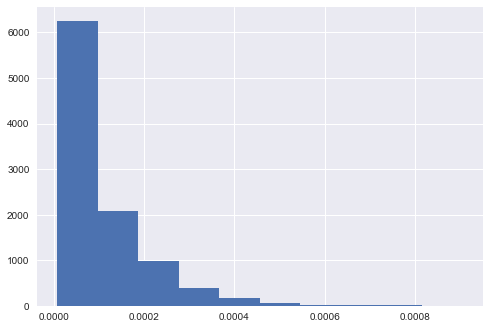

In [252]:
plt.hist(txn['Number'].value_counts(normalize=True))
plt.show()

In [333]:
txn['Number'].value_counts().describe()

count    10000.00000
mean        13.35820
std         13.83693
min          1.00000
25%          4.00000
50%          8.00000
75%         19.00000
max        121.00000
Name: Number, dtype: float64

Text(0, 0.5, 'Number of punks')

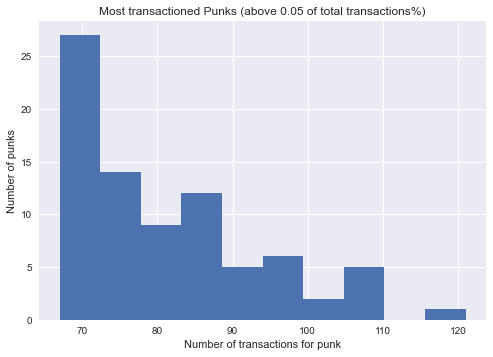

In [227]:
plt.hist(txn['Number'].value_counts()[txn['Number'].value_counts(normalize=True) > 0.0005])
plt.title('Most transactioned Punks (above 0.05 of total transactions%)')
plt.xlabel('Number of transactions for punk')
plt.ylabel('Number of punks')

In [332]:
txn['Number'].value_counts()[txn['Number'].value_counts(normalize=True) > 0.0005].describe()

count     81.000000
mean      80.876543
std       12.276383
min       67.000000
25%       71.000000
50%       77.000000
75%       88.000000
max      121.000000
Name: Number, dtype: float64

#### Conclusiones número de transacciones por punk

Si normalizamos los datos de la variable 'number' o id_punk y las visualizamos en forma de histograma observamos que tiene una distribución muy asimétrica a la derecha (right-skewed), en forma inversamente exponencial. Cogiendo solo los ids que supongan por lo menos un 0.05% de las transacciones totales, los valores únicos disminuyen mucho (de 10.000 a 81) y la distribución de los datos toma una pendiente menos pronunciada.

De este anális podemos concluir que, a excepción de pocos punks, la mayoria tiene un número total de transacciones similar. La media se encuentra en las 13,38 transacciones por punk, con una desviación estàndar de 13,86. El mínimo és 1 con un màximo de 121, encontrandose el 25 percentil a 4, el 50 a 8 y el 75 a 19. Hay un gran salto entre el 75 percentil y el màximo (de 19 a 121 transacciones).

#### 2.2.2 Número de ventas por punk

In [239]:
txn['Number'][txn['Type']=='Sold'].value_counts().describe()

count    5699.000000
mean        2.192314
std         1.469667
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        13.000000
Name: Number, dtype: float64

La media de veces que se ha vendido un punk es 2.19, con una desviación estándar de 1,47. Hay 4301 punks que NO han sido vendidos nunca y 5699 punks que han sido vendidos al menos una vez. De los punks vendidos, el máximo de veces es 13, estando el 25 percentil en 1 vez, el 50 en 2 veces y el 75 percentil en 3.

De estos datos podemos concluir que, de los punks que han sido vendidos alguna vez (56,99%), un 75% de ellos ha sido vendido un máximo de 3 veces.

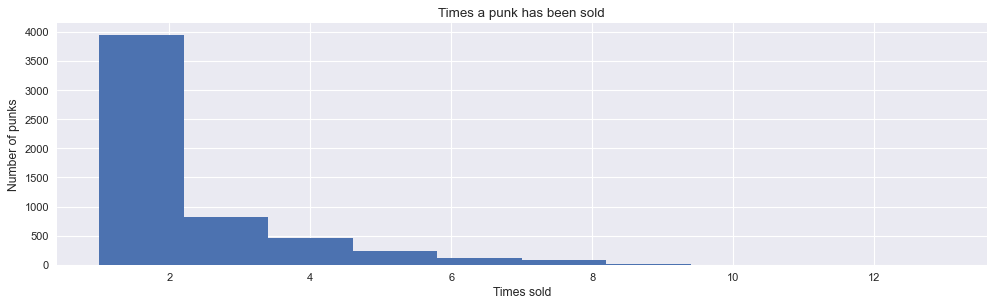

In [254]:
figure(figsize=(15, 4), dpi=80)

plt.hist(txn['Number'][txn['Type']=='Sold'].value_counts())

plt.title('Times a punk has been sold')
plt.xlabel('Times sold')
plt.ylabel('Number of punks')

plt.show()

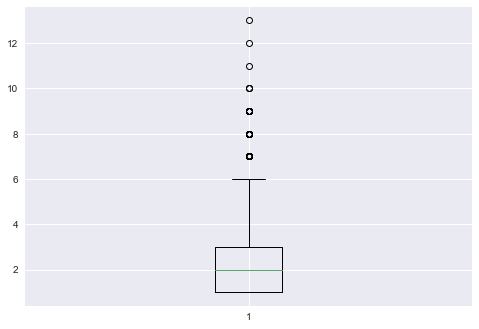

In [266]:
plt.boxplot(txn['Number'][txn['Type']=='Sold'].value_counts())
plt.show()

Mediante las visualizaciones observamos que a partir de 6 veces, ese punk se considera un outlier. Podemos estudiar los beneficios reportados de estos outliers con el resto y si el beneficio es incremental con el número de ventas.

In [259]:
txn['Number'][txn['Type']=='Sold'].value_counts()[txn['Number'][txn['Type']=='Sold'].value_counts() > 6].describe()

count    102.000000
mean       7.656863
std        1.103506
min        7.000000
25%        7.000000
50%        7.000000
75%        8.000000
max       13.000000
Name: Number, dtype: float64

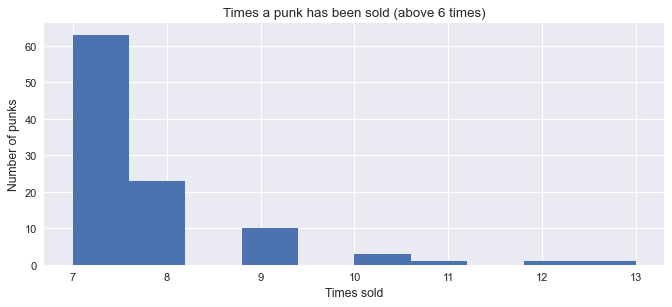

In [263]:
figure(figsize=(10, 4), dpi=80)

plt.hist(txn['Number'][txn['Type']=='Sold'].value_counts()[txn['Number'][txn['Type']=='Sold'].value_counts() > 6])

plt.title('Times a punk has been sold (above 6 times)')
plt.xlabel('Times sold')
plt.ylabel('Number of punks')

plt.show()

El total de punks en este grupo es de 102, un 1'02%. De igual forma la mayoria se encuentran en las 7 veces, seguido de 8 y 9, de forma descendiente. La resta de veces son residuales:

     Veces    N punks
 
    - 7     63 (0,63%)
    - 8     23 (0,23%)
    - 9     10 (0.1%)
    - 10     3 (0.03%)
    - 11     1 (0.01%)
    - 12     1 (0.01%)
    - 13     1 (0.01%)

In [267]:
txn['Number'][txn['Type']=='Sold'].value_counts()[txn['Number'][txn['Type']=='Sold'].value_counts() > 6].value_counts()

7     63
8     23
9     10
10     3
11     1
12     1
13     1
Name: Number, dtype: int64

#### 2.2.2 Preu en dolars

In [319]:
txn['Amount_dolars'][txn['Type'] == 'Sold'].describe().round(2)

count      12447.00
mean       29323.05
std       112329.78
min            0.00
25%          134.06
50%         6754.52
75%        42648.71
max      7670018.77
Name: Amount_dolars, dtype: float64

In [329]:
txn['Amount_dolars'][txn['Type'] == 'Sold'].mean()

29323.052302562603

ValueError: x and y must have same first dimension, but have shapes (133582,) and (1,)

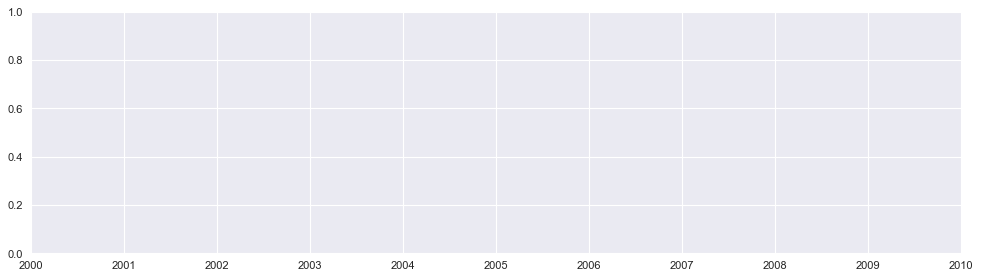

In [331]:
plt.style.use('seaborn')
figure(figsize=(15, 4), dpi=80)

plt.plot(txn.index, txn['Amount_dolars'][txn['Type'] == 'Sold'].mean())

plt.title('Ethereum Price')
plt.ylabel('Price ($)');

plt.show()

#### 2.2.3 Preu en Ethereums

In [321]:
txn['Amount_eth'][txn['Type'] == 'Sold'].describe().round(2)

count    12494.00
mean        14.78
std         59.19
min          0.00
25%          0.60
50%          6.50
75%         21.95
max       4200.00
Name: Amount_eth, dtype: float64

#### 2.2.4 Adj. Close (ETH-Dolar)

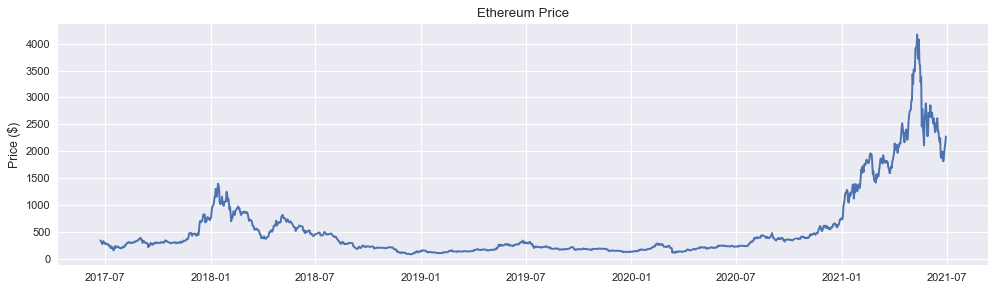

In [325]:
plt.style.use('seaborn')
figure(figsize=(15, 4), dpi=80)

plt.plot(txn.index, txn['Adj Close'])

plt.title('Ethereum Price')
plt.ylabel('Price ($)');

plt.show()

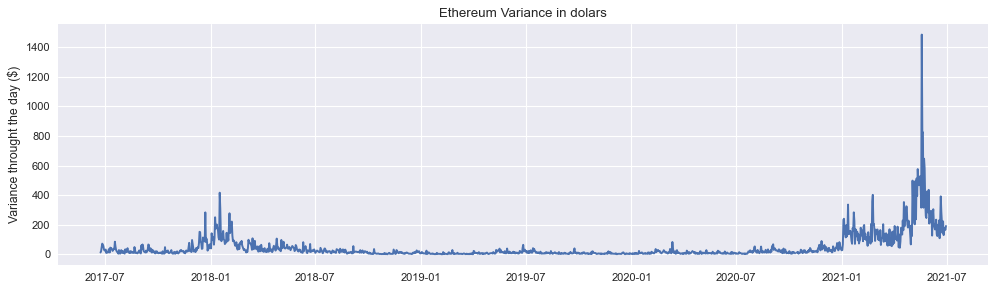

In [326]:
plt.style.use('seaborn')
figure(figsize=(15, 4), dpi=80)

plt.plot(txn.index, txn['Variance'])

plt.title('Ethereum Variance in dolars')
plt.ylabel('Variance throught the day ($)');

plt.show()

In [334]:
txn

,Number,Type,From,To,Amount_dolars,Amount_eth,user_transaction,Adj Close,Variance
Date,,,,,,,,,
2021-06-30,7051,Offered,NaN,NaN,60707.68,26.69,0x9e1893,2274.55,192.228272
2021-06-30,6263,Bid withdrawn,0x12D715,NaN,38667.31,17.00,0x6feee6,2274.55,192.228272
2021-06-30,9400,Offer withdrawn,NaN,NaN,NaN,NaN,0xf18631,2274.55,192.228272
2021-06-30,6493,Offered,NaN,NaN,45354.48,19.94,0xb07068,2274.55,192.228272
2021-06-30,6281,Transfer,0x8F8B47,0x63d4a5,NaN,NaN,0xd09776,2274.55,192.228272
...,...,...,...,...,...,...,...,...,...
2017-06-23,3029,Claimed,NaN,0xe4d36b,NaN,NaN,0x218fdb,341.74,13.016022
2017-06-23,8419,Claimed,NaN,0x6f4a2d,NaN,NaN,0x82a4ad,341.74,13.016022
2017-06-23,8420,Claimed,NaN,0xcc7c33,NaN,NaN,0x82a4ad,341.74,13.016022


In [116]:
# per comparar dates
d1 = datetime.datetime(2017, 1, 1)
txn[txn.index>d1]

,Number,Type,From,To,Amount_dolars,Amount_eth,user_transaction,Adj Close
Date,,,,,,,,
2021-06-30,7051,Offered,NaN,NaN,60707.68,26.69,0x9e1893,2274.55
2021-06-30,6263,Bid withdrawn,0x12D715,NaN,38667.31,17.00,0x6feee6,2274.55
2021-06-30,9400,Offer withdrawn,NaN,NaN,NaN,NaN,0xf18631,2274.55
2021-06-30,6493,Offered,NaN,NaN,45354.48,19.94,0xb07068,2274.55
2021-06-30,6281,Transfer,0x8F8B47,0x63d4a5,NaN,NaN,0xd09776,2274.55
...,...,...,...,...,...,...,...,...
2017-06-23,3029,Claimed,NaN,0xe4d36b,NaN,NaN,0x218fdb,341.74
2017-06-23,8419,Claimed,NaN,0x6f4a2d,NaN,NaN,0x82a4ad,341.74
2017-06-23,8420,Claimed,NaN,0xcc7c33,NaN,NaN,0x82a4ad,341.74
